#### Grid N Clustering 

In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Set Random number Generator

In [3]:
np.random.seed(seed = 0)

In [4]:
def coordinates_to_box(coords, grid_length):
    """
    coords:(sequence) the box coordinates
    grid_length: integer: number of boxes in each dimension
    Takes the coordinates of a box as a sequence and returns
    the number of the box
    
    """
    if max(coords)>= grid_length:
        print('Error: each coordinate MUST be smaller than the grid length')
        return
    
    return sum([grid_length**i*c for i,c in enumerate(coords)])

def values_to_coordinates_to_index_numpy(values, min_support, max_support, box_length, return_all= False):
    """
    values: numpy array with the values of data
    min_support: the minimum value the box clustering is considering
    box_length: the length of each box
    grid_length: Number of boxes in each grid dimension
    
    """
    grid_length = int((max_support-min_support)/box_length)
    coord_float = np.floor((values-min_support)/box_length).astype('int')
    pivot_array = np.array([grid_length**i for i in range(values.shape[1])])
    index_array = np.sum(coord_float*pivot_array, axis = 1).astype(int)
    
    x_names = ['x_'+str(i) for i in range(1, values.shape[1]+1)]
    values_pd = pd.DataFrame(values, columns = x_names)
    values_pd['box#'] = index_array
    if return_all:
        return [values_pd, values, coord_float, index_array]
    else:
        return values_pd
    
    

In [5]:
def circle(values, center, radius0, radius1):
    
    ans = np.sqrt(np.sum((values-center)**2, axis = 1))
    return ((ans >= radius0) & (ans <= radius1)).astype(int)

def homogeneity(data, group_name = 'box#'):

    return data.groupby(group_name).apply(lambda x: pd.Series(x.y.value_counts().max()/x.y.value_counts().sum(), index = ['homogeinity']))
    

In [6]:
values = np.random.rand(100000,2)
df = values_to_coordinates_to_index_numpy(values, 0,1, 0.2)
df['y'] = circle(values, np.array([0.5,0.5]), 0.2, 0.4)

In [17]:
import matplotlib as mpl
plt.style.use('seaborn-paper')

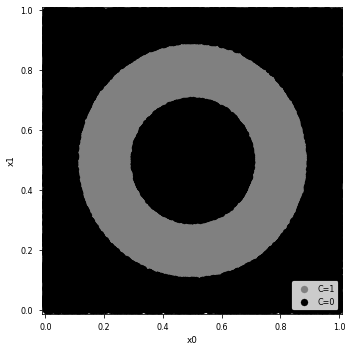

In [33]:
filte = df.y == 1
fig, ax = plt.subplots(figsize = [5,5])
ax.scatter(values[filte][:,0], values[filte][:,1], s=50,  c='gray')
ax.scatter(values[~filte][:,0], values[~filte][:,1],s=50, c='black')
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.legend(['C=1', 'C=0'])
ax.margins(0)
fig.tight_layout()

plt.show()

In [34]:
fig.savefig('data.pdf', pad_inches=0,bbox_inches='tight')

In [8]:
%%time
graph = []
intervals = [0.01, 0.05, 0.1, 0.2, 0.25, 0.5]
for box_size in intervals:
    dfi = values_to_coordinates_to_index_numpy(values, 0,1, box_size)
    dfi['y'] = df['y']
    hom = homogeneity(dfi).mean().iloc[0]
    boxes = (1/box_size)**2
    graph.append([boxes, hom])
 


In [14]:
np.log10(graph[:,0])

array([4.        , 2.60205999, 2.        , 1.39794001, 1.20411998,
       0.60205999])

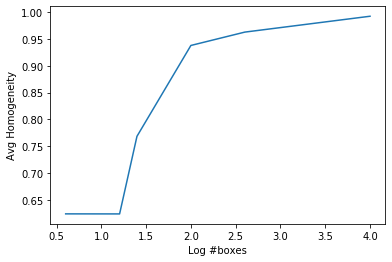

In [15]:
graph = np.array(graph)
plt.plot(np.log10(graph[:,0]), graph[:,1])
plt.plot()
plt.xlabel('Log #boxes')
plt.ylabel('Avg Homogeneity')
plt.show()